# A simple model of global cascades on random networks

Duncan J. Watts*

Department of Sociology, Columbia University New York, NY 10027

5766–5771 PNAS April 30, 2002. vol. 99 no. 9
www.pnas.org/cgi/doi/10.1073/pnas.082090499


**Fig. 1. Cascade windows for the threshold model**

![image.png](./img/watts1.png)

   Z represents average degree; $\phi_*$ represents average threshold. 



**Fig. 4. Analytically derived cascade windows for heterogeneous networks.** 

![image.png](./img/watts2.png)

Heterogeneity plays an ambiguous role in determining a system’s stability: 
- increasingly heterogeneous thresholds make the system more vulnerable to global cascades; 
- but an increasingly heterogeneous degree distribution makes it less vulnerable.





In [68]:
from scipy.stats import norm
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib

matplotlib.style.use('fivethirtyeight')

In [69]:
def generate_threshold(Mean, Standard_Deviation, N):
    return np.random.normal(Mean, Standard_Deviation, N)

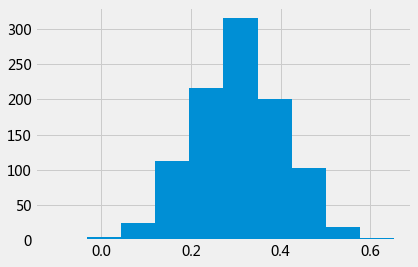

In [94]:
Mean = 0.3
Standard_Deviation = 0.1
N = 1000
thresholds = generate_threshold(Mean, Standard_Deviation, N)

plt.hist(thresholds)
plt.show()

In [95]:
thresholds[0]

0.3276822791442385

In [45]:
# Network generation
g = nx.erdos_renyi_graph(1000, 0.001)

deg = [j for i, j in g.degree()]
average_degree = np.sum(deg)/len(deg)
average_degree

1.04

```
pip install -U ndlib
```

## Simulation

In [7]:
import networkx as nx
import ndlib.models.epidemics as ep
import ndlib.models.ModelConfig as mc
from bokeh.io import output_notebook, show
from ndlib.viz.bokeh.DiffusionTrend import DiffusionTrend
from ndlib.viz.bokeh.DiffusionPrevalence import DiffusionPrevalence
from ndlib.viz.bokeh.MultiPlot import MultiPlot

In [87]:
def ER_model_random_network(node_num, prob, thresholds, fraction_infected, iteration_num):
    # Network topology
    g = nx.erdos_renyi_graph(node_num, prob)
    deg = [j for i, j in g.degree()]
    average_degree = np.sum(deg)/len(deg)
    # Model selection
    model = ep.ThresholdModel(g)
    # Model Configuration
    config = mc.Configuration()
    config.add_model_parameter('fraction_infected', fraction_infected)
    # Setting node parameters
    for k, i in enumerate(g.nodes()):
        config.add_node_configuration("threshold", i, thresholds[k])

    model.set_initial_status(config)
    # Simulation execution
    iterations = model.iteration_bunch(iteration_num)
    return model, iterations, average_degree

In [119]:
Mean = 0.4
Standard_Deviation = 0.1
N = 1000
thresholds = generate_threshold(Mean, Standard_Deviation, N)
prob = 0.001
t = 30
fraction_infected = 0.1
model, iterations, average_degree = ER_model_random_network(N, prob, thresholds, fraction_infected, t)
trends = model.build_trends(iterations)
#susceptible = trends[0]['trends']['node_count'][0]
infected = trends[0]['trends']['node_count'][1]
print(average_degree, np.max(infected))

100%|██████████| 30/30 [00:00<00:00, 506.33it/s]

1.016 207


In [121]:
infected_list = []
threshold_list = np.linspace(0, 1, 20)
for Mean in threshold_list:
    Standard_Deviation = 0.01
    N = 1000
    thresholds = generate_threshold(Mean, Standard_Deviation, N)
    prob = 0.001
    t = 30
    fraction_infected = 0.1
    model, iterations, average_degree = ER_model_random_network(N, prob, thresholds, fraction_infected, t)
    trends = model.build_trends(iterations)
    #susceptible = trends[0]['trends']['node_count'][0]
    infected = trends[0]['trends']['node_count'][1]
    infected_list.append(np.max(infected))

100%|██████████| 30/30 [00:00<00:00, 510.60it/s]


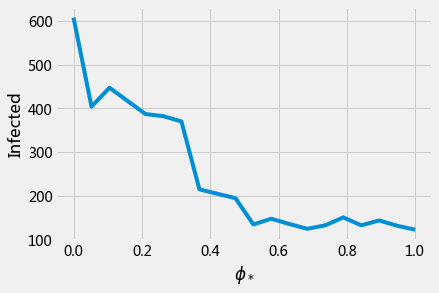

In [122]:
plt.plot(threshold_list, infected_list)
plt.xlabel("$\phi_*$")
plt.ylabel("Infected")
plt.show()

In [126]:
infected_list = []
degree_list = []
prob_list = [i/1000 for i in range(1, 20)]
Mean = 0.1
Standard_Deviation = 0.01
N = 1000
thresholds = generate_threshold(Mean, Standard_Deviation, N)
for prob in prob_list:
    t = 30
    fraction_infected = 0.1
    model, iterations, average_degree = ER_model_random_network(N, prob, thresholds, fraction_infected, t)
    trends = model.build_trends(iterations)
    #susceptible = trends[0]['trends']['node_count'][0]
    infected = trends[0]['trends']['node_count'][1]
    infected_list.append(np.max(infected))
    degree_list.append(average_degree)

100%|██████████| 30/30 [00:00<00:00, 1192.56it/s]


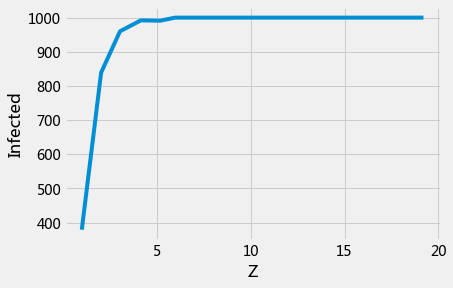

In [127]:
plt.plot(degree_list, infected_list)
plt.xlabel("Z")
plt.ylabel("Infected")
plt.show()

## END

In [8]:
# In the code below is shown an example of instantiation and execution of a Threshold model simulation 
# on a random graph: we set the initial set of infected nodes as 1% of the overall population, 
# and assign a threshold of 0.25 to all the nodes.

def watts_model_ba_network(node_num, m, threshold, fraction_infected, iteration_num):
    # change these two parameters
    # num_neighbors = 1
    # threshold = 0.5
    # fraction_infected = 0.1
    # iteration_num = 30

    # Network topology
    #g = nx.erdos_renyi_graph(1000, 0.1)
    g = nx.barabasi_albert_graph(1000, m)
    # Model selection
    model = ep.ThresholdModel(g)
    # Model Configuration
    config = mc.Configuration()
    config.add_model_parameter('fraction_infected', fraction_infected)
    # Setting node parameters
    for i in g.nodes():
        config.add_node_configuration("threshold", i, threshold)

    model.set_initial_status(config)
    # Simulation execution
    iterations = model.iteration_bunch(iteration_num)
    return model, iterations

In [12]:
model, iterations = watts_model_ba_network(1000, 1, 0.5, 0.1, 30)
trends = model.build_trends(iterations)
#susceptible = trends[0]['trends']['node_count'][0]
infected = trends[0]['trends']['node_count'][1]

100%|██████████| 30/30 [00:00<00:00, 512.94it/s]


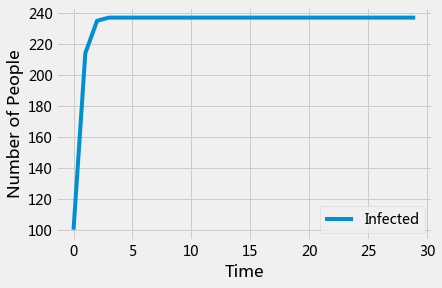

In [13]:
import matplotlib.pyplot as plt
import matplotlib

matplotlib.style.use('fivethirtyeight')
t = range(len(infected))

#plt.plot(t, susceptible, label = 'Susceptible')
plt.plot(t, infected, label = 'Infected')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Number of People")
plt.show()


In [11]:
def plot_diffusion(model, iterations):
    output_notebook() # show bokeh in notebook
    trends = model.build_trends(iterations)
    viz = DiffusionTrend(model, trends)
    p = viz.plot(width=400, height=400)

    viz2 = DiffusionPrevalence(model, trends)
    p2 = viz2.plot(width=400, height=400)

    vm = MultiPlot()
    vm.add_plot(p)
    vm.add_plot(p2)
    m = vm.plot()
    show(m)

In [12]:
model, iterations = watts_model_ba_network(1, 0.5, 0.1, 30)
plot_diffusion(model, iterations)

100%|██████████| 30/30 [00:00<00:00, 495.69it/s]


Loading BokehJS ...

In [1]:
pip install -U thresholdmodel


Requirement already up-to-date: thresholdmodel in /opt/anaconda3/lib/python3.7/site-packages (0.0.3)
Note: you may need to restart the kernel to use updated packages.


https://github.com/benmaier/thresholdmodel

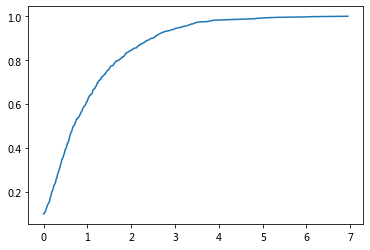

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

from thresholdmodel import ThreshModel

N = 1000
k = 10

thresholds = 0.1
initially_activated = np.arange(100)

G = nx.fast_gnp_random_graph(N, k/(N-1.0))

Thresh = ThreshModel(G,initially_activated,thresholds)
t, cascade_size = Thresh.simulate()

plt.plot(t,cascade_size)
plt.show()

In [3]:
G

In [20]:
nx.fast_gnp_random_graph?

In [18]:
from thresholdmodel import ThreshModel

N = 1000
k = 10
initially_activated = np.arange(100)
G = nx.fast_gnp_random_graph(N, k/(N-1.0))

thresholds = list(np.random.rand(G.number_of_nodes()))


Thresh = ThreshModel(G, initially_activated, thresholds)
t, cascade_size = Thresh.simulate()

https://github.com/benmaier/thresholdmodel/issues/1

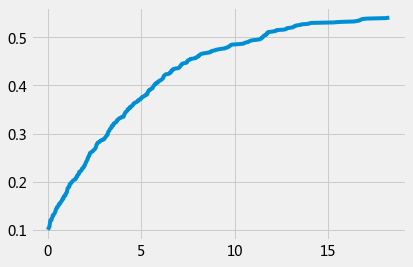

In [19]:
plt.plot(t,cascade_size)
plt.show()